# 1.0 安裝套件

In [210]:
# !pip install matplotlib
# !pip install yfinance
# !pip install pandas
# !pip install numpy


In [211]:
# !pip install pyarrow

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pandas.tseries.offsets import MonthEnd
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
plt.style.use('ggplot')
plt.rcParams.update({
    'font.weight': 'bold',
    'text.color': 'k',
    'axes.labelcolor': 'k',
    'xtick.color': 'k',
    'ytick.color': 'k'})
warnings.simplefilter(action='ignore', category=Warning)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 2.0 資料前處理    

- 使用 pandas 的 read_feather 讀取 feather 檔案。

In [213]:
df = pd.read_feather('./Data/課堂練習.feather')
df

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,1101 台泥,2019-01-30,23.680401,23.871300,23.521200,23.775900,12214,454594,0.6739,0.2391,...,3.3387,0.25,1.4825,37.349998,41.049999,33.650002,NaN,NaN,NaN,TSE
1,1102 亞泥,2019-01-30,25.877100,26.308399,25.625500,26.200600,9633,349158,1.2500,0.2866,...,3.2922,0.45,2.6389,36.450001,40.049999,32.849998,NaN,NaN,NaN,TSE
2,1103 嘉泥,2019-01-30,10.668200,10.668200,10.590900,10.668200,300,4140,0.7299,0.0387,...,3.6232,0.10,0.7299,13.800000,15.150000,12.450000,NaN,NaN,NaN,TSE
3,1104 環泥,2019-01-30,14.372700,14.561400,14.372700,14.561400,92,1767,1.0471,0.0141,...,5.6995,0.20,1.3089,19.299999,21.200001,17.400000,NaN,NaN,NaN,TSE
4,1108 幸福,2019-01-30,6.560500,6.595900,6.542800,6.595900,273,2027,0.2688,0.0675,...,0.0000,0.02,0.8065,7.460000,8.200000,6.720000,NaN,NaN,NaN,TSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122684,9951 皇田,2023-08-23,73.300003,75.099998,73.300003,74.599998,114,8536,1.7735,0.1522,...,4.4236,1.30,2.4557,74.599998,82.000000,67.199997,NaN,NaN,NaN,OTC
2122685,9955 佳龍,2023-08-23,21.850000,22.049999,21.850000,21.900000,143,3146,0.2288,0.1386,...,0.0000,0.05,0.9153,21.900000,24.049999,19.750000,NaN,NaN,NaN,TSE
2122686,9958 世紀鋼,2023-08-23,138.000000,143.500000,138.000000,142.000000,2536,359064,2.8986,1.0749,...,0.3481,4.00,3.9855,142.000000,156.000000,128.000000,NaN,NaN,NaN,TSE
2122687,9960 邁達康,2023-08-23,26.350000,26.600000,26.299999,26.400000,7,184,0.0000,0.0208,...,8.3335,0.00,1.1364,26.400000,29.000000,23.799999,NaN,NaN,NaN,OTC


## 2.1 查看數據結構

使用 head()、info()、describe()等方法來快速查看數據的前幾行、結構信息和統計摘要。

In [214]:
# 查看前 5 行
df.head(5)

# 查看後 5 行
df.tail(5)

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
2122684,9951 皇田,2023-08-23,73.300003,75.099998,73.300003,74.599998,114,8536,1.7735,0.1522,...,4.4236,1.30,2.4557,74.599998,82.000000,67.199997,NaN,NaN,NaN,OTC
2122685,9955 佳龍,2023-08-23,21.850000,22.049999,21.850000,21.900000,143,3146,0.2288,0.1386,...,0.0000,0.05,0.9153,21.900000,24.049999,19.750000,NaN,NaN,NaN,TSE
2122686,9958 世紀鋼,2023-08-23,138.000000,143.500000,138.000000,142.000000,2536,359064,2.8986,1.0749,...,0.3481,4.00,3.9855,142.000000,156.000000,128.000000,NaN,NaN,NaN,TSE
2122687,9960 邁達康,2023-08-23,26.350000,26.600000,26.299999,26.400000,7,184,0.0000,0.0208,...,8.3335,0.00,1.1364,26.400000,29.000000,23.799999,NaN,NaN,NaN,OTC
2122688,9962 有益,2023-08-23,16.850000,16.900000,16.650000,16.900000,122,2068,0.5952,0.1352,...,10.6509,0.10,1.4881,16.900000,18.549999,15.250000,NaN,NaN,NaN,OTC


In [215]:
# 篩選符合特定條件的資料行
df[df['證券代碼'] == '1101 台泥']

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
0,1101 台泥,2019-01-30,23.680401,23.871300,23.521200,23.775900,12214,454594,0.6739,0.2391,...,3.3387,0.25,1.4825,37.349998,41.049999,33.650002,NaN,NaN,NaN,TSE
1763,1101 台泥,2019-01-29,23.553101,23.616699,23.362101,23.616699,10057,371981,0.2703,0.1969,...,3.3600,0.10,1.0811,37.099998,40.799999,33.400002,NaN,NaN,NaN,TSE
3526,1101 台泥,2019-01-28,23.393900,23.553101,23.362101,23.553101,13642,503258,1.0929,0.2671,...,3.3700,0.40,0.8197,37.000000,40.700001,33.299999,NaN,NaN,NaN,TSE
5289,1101 台泥,2019-01-25,23.171101,23.393900,23.107500,23.298401,11808,431875,0.5495,0.2312,...,3.4100,0.20,1.2363,36.599998,40.250000,32.950001,NaN,NaN,NaN,TSE
7053,1101 台泥,2019-01-24,23.202900,23.266600,23.011999,23.171101,7992,290662,-0.1372,0.1565,...,3.4300,-0.05,1.0974,36.400002,40.000000,32.799999,NaN,NaN,NaN,TSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2113697,1101 台泥,2023-08-17,36.000000,36.049999,35.400002,35.650002,41929,1451706,-1.1096,0.5859,...,1.4017,-0.40,1.8031,35.650002,39.200001,32.099998,NaN,NaN,NaN,TSE
2115495,1101 台泥,2023-08-18,35.799999,35.799999,35.099998,35.150002,30753,1087997,-1.4025,0.4297,...,1.4217,-0.50,1.9635,35.150002,38.650002,31.650000,NaN,NaN,NaN,TSE
2117293,1101 台泥,2023-08-21,35.000000,35.450001,35.000000,35.400002,15868,559417,0.7112,0.2217,...,1.4116,0.25,1.2802,35.400002,38.900002,31.900000,NaN,NaN,NaN,TSE
2119091,1101 台泥,2023-08-22,35.549999,35.549999,35.299999,35.400002,12160,430418,0.0000,0.1699,...,1.4116,0.00,0.7062,35.400002,38.900002,31.900000,NaN,NaN,NaN,TSE


In [216]:
# 查看各欄位資料 (有無缺失值、資料型態)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122689 entries, 0 to 2122688
Data columns (total 35 columns):
 #   Column      Dtype         
---  ------      -----         
 0   證券代碼        category      
 1   年月日         datetime64[ns]
 2   開盤價(元)      float32       
 3   最高價(元)      float32       
 4   最低價(元)      float32       
 5   收盤價(元)      float32       
 6   成交量(千股)     int32         
 7   成交值(千元)     int32         
 8   報酬率％        float32       
 9   週轉率％        float32       
 10  流通在外股數(千股)  int32         
 11  市值(百萬元)     int32         
 12  最後揭示買價      float32       
 13  最後揭示賣價      float32       
 14  報酬率-Ln      float32       
 15  市值比重％       float32       
 16  成交值比重％      float32       
 17  成交筆數(筆)     int32         
 18  本益比-TSE     float32       
 19  本益比-TEJ     float32       
 20  股價淨值比-TSE   float32       
 21  股價淨值比-TEJ   float32       
 22  漲跌停         category      
 23  股價營收比-TEJ   float32       
 24  股利殖利率-TSE   float32       
 25  現金股利率       float3

In [217]:
# 查看各欄位統計摘要
print(df.describe())

                                 年月日        開盤價(元)        最高價(元)  \
count                        2122689  2.122683e+06  2.122689e+06   
mean   2021-04-30 07:12:37.743973888  5.511185e+01  5.591589e+01   
min              2019-01-02 00:00:00  1.000000e-01  1.100000e-01   
25%              2020-03-13 00:00:00  1.630000e+01  1.650000e+01   
50%              2021-05-18 00:00:00  2.821040e+01  2.854970e+01   
75%              2022-06-07 00:00:00  5.450845e+01  5.517810e+01   
max              2023-08-23 00:00:00  4.488230e+03  4.540520e+03   
std                              NaN  1.230937e+02  1.252392e+02   

             最低價(元)        收盤價(元)       成交量(千股)       成交值(千元)          報酬率％  \
count  2.122689e+06  2.122689e+06  2.122689e+06  2.122689e+06  2.122689e+06   
mean   5.425546e+01  5.500571e+01  2.531804e+03  1.628021e+05  6.900336e-02   
min    1.000000e-01  1.100000e-01  0.000000e+00  0.000000e+00 -7.478040e+01   
25%    1.609110e+01  1.628880e+01  5.300000e+01  1.358000e+03 -8.757000

## 2.2 處理缺失值(NaN)

應該逐欄、逐列檢查缺失值，並且確定缺失值的原因。幾個可能的原因 :

1. 資料輸入錯誤 : 可以考慮刪除或者修正這些資料。
2. 資料不存在 : 可以考慮刪除，或將缺失值替換為0或其他值。
3. 造成的原因不明 : 可以考慮將缺失值替換為0或者其他值，或者刪除這些資料。

Some thoughts :
- 方法並不是絕對的，需要根據資料特點來決定。
- 比起隨意刪除資料，更危險的是隨意填補缺失值，因為這會產生不真實的資料，可能會導致資料偏差。
- 通常你需要一次次的檢查，確保你的處理方式是合理的。

In [218]:
# 查看各欄位有多少個缺失值
df.isnull().sum()

證券代碼                0
年月日                 0
開盤價(元)              6
最高價(元)              0
最低價(元)              0
收盤價(元)              0
成交量(千股)             0
成交值(千元)             0
報酬率％                0
週轉率％                0
流通在外股數(千股)          0
市值(百萬元)             0
最後揭示買價          12310
最後揭示賣價          31297
報酬率-Ln              0
市值比重％           77066
成交值比重％          77066
成交筆數(筆)             0
本益比-TSE        491069
本益比-TEJ        521874
股價淨值比-TSE       46411
股價淨值比-TEJ       15838
漲跌停           2088946
股價營收比-TEJ       15931
股利殖利率-TSE       46248
現金股利率            1633
股價漲跌(元)           187
高低價差%              35
次日開盤參考價             0
次日漲停價           34874
次日跌停價           34874
注意股票(A)       2095167
處置股票(D)       2107823
全額交割(Y)       2057799
市場別                 0
dtype: int64

In [219]:
# 只顯示有缺失值的欄位
nan_df = df.isnull().sum()
nan_df[nan_df != 0] 

開盤價(元)             6
最後揭示買價         12310
最後揭示賣價         31297
市值比重％          77066
成交值比重％         77066
本益比-TSE       491069
本益比-TEJ       521874
股價淨值比-TSE      46411
股價淨值比-TEJ      15838
漲跌停          2088946
股價營收比-TEJ      15931
股利殖利率-TSE      46248
現金股利率           1633
股價漲跌(元)          187
高低價差%             35
次日漲停價          34874
次日跌停價          34874
注意股票(A)      2095167
處置股票(D)      2107823
全額交割(Y)      2057799
dtype: int64

### Case 1. 刪除開盤價缺失值 

In [220]:
df_open_na = df[df['開盤價(元)'].isnull()].copy()   # 使用copy()以避免改動到原本的dataframe
df_open_na[['證券代碼', '年月日', '市場別']]

# 發現全部的缺失市場別都是REG(興櫃股票)，合理猜測是因為初上興櫃，所以沒有開盤價

,證券代碼,年月日,市場別
264684,6736 碩辣椒,2019-08-15,REG
275234,4570 傑生,2019-08-06,REG
335335,6740 松果購物,2019-10-16,REG
1024373,7452 乂迪生,2021-04-16,REG
1196787,6837 富利康科技,2021-09-29,REG
1232320,6837 富利康科技,2021-09-29,REG


In [221]:
# 檢查猜測是否合理 -> Yes!
df[df['證券代碼'] == df_open_na['證券代碼'].iloc[0]].sort_values(by='年月日').head()

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,現金股利率,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別
264684,6736 碩辣椒,2019-08-15,NaN,36.290001,28.030001,36.000000,690,21883,9.0909,5.9075,...,NaN,NaN,NaN,31.700001,NaN,NaN,NaN,NaN,NaN,REG
262919,6736 碩辣椒,2019-08-16,36.000000,38.930000,34.000000,38.930000,206,7363,8.1389,1.7637,...,NaN,2.93,15.5521,35.720001,NaN,NaN,NaN,NaN,NaN,REG
261155,6736 碩辣椒,2019-08-19,38.930000,40.119999,37.880001,39.990002,188,7346,2.7228,1.6096,...,NaN,1.06,6.2710,38.889999,NaN,NaN,NaN,NaN,NaN,REG
259390,6736 碩辣椒,2019-08-20,39.990002,43.369999,39.009998,41.299999,202,8342,3.2758,1.7295,...,NaN,1.31,11.2111,41.119999,NaN,NaN,NaN,NaN,NaN,REG
257625,6736 碩辣椒,2019-08-21,41.299999,44.220001,42.000000,43.000000,167,7229,4.1162,1.4298,...,NaN,1.70,5.3988,43.049999,NaN,NaN,NaN,NaN,NaN,REG


In [222]:
# 刪除只有開盤價為缺失值的行
df.dropna(subset=['開盤價(元)'],inplace=True)

# 檢查一下，這樣是不是真的刪掉了
df.isnull().sum()

證券代碼                0
年月日                 0
開盤價(元)              0
最高價(元)              0
最低價(元)              0
收盤價(元)              0
成交量(千股)             0
成交值(千元)             0
報酬率％                0
週轉率％                0
流通在外股數(千股)          0
市值(百萬元)             0
最後揭示買價          12310
最後揭示賣價          31297
報酬率-Ln              0
市值比重％           77060
成交值比重％          77060
成交筆數(筆)             0
本益比-TSE        491063
本益比-TEJ        521874
股價淨值比-TSE       46405
股價淨值比-TEJ       15838
漲跌停           2088940
股價營收比-TEJ       15931
股利殖利率-TSE       46242
現金股利率            1629
股價漲跌(元)           181
高低價差%              32
次日開盤參考價             0
次日漲停價           34868
次日跌停價           34868
注意股票(A)       2095161
處置股票(D)       2107817
全額交割(Y)       2057793
市場別                 0
dtype: int64

### Case 2. 最後揭示買價缺失值 - 以全部平均值填補

In [223]:
df_bid_na = df[df['最後揭示買價'].isnull()]
df_bid_na[['證券代碼', '年月日', '最後揭示買價']]

,證券代碼,年月日,最後揭示買價
1215,6148 驊宏資,2019-01-30,NaN
1326,6291 沛亨,2019-01-30,NaN
1672,3519 綠能,2019-01-30,NaN
1757,910708 恒大健-DR,2019-01-30,NaN
2873,5455 昇益,2019-01-29,NaN
...,...,...,...
2121735,3675 德微,2023-08-23,NaN
2121743,3689 湧德,2023-08-23,NaN
2121913,4806 昇華,2023-08-23,NaN
2122075,5514 三豐,2023-08-23,NaN


In [224]:
bid_mean = df['最後揭示買價'].mean()
bid_mean

61.446537

In [225]:
df['最後揭示買價_fillna_1'] = df['最後揭示買價'].fillna(bid_mean)

In [226]:
df[df['最後揭示買價_fillna_1'] == bid_mean]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1
1215,6148 驊宏資,2019-01-30,7.684200,7.684200,7.684200,7.684200,0,0,0.0000,0.0000,...,0.00,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,OTC,61.446537
1326,6291 沛亨,2019-01-30,24.059299,26.815201,22.090799,26.815201,28,152,9.8566,0.0549,...,0.55,19.354799,6.130000,6.740000,5.520000,NaN,NaN,Y,OTC,61.446537
1672,3519 綠能,2019-01-30,5.400000,5.400000,5.400000,5.400000,493,2665,-10.0000,0.1136,...,-0.60,0.000000,5.400000,5.940000,4.860000,NaN,D,Y,TSE,61.446537
1757,910708 恒大健-DR,2019-01-30,3050.000000,3050.000000,3050.000000,3050.000000,0,0,0.0000,0.0000,...,0.00,0.000000,3050.000000,3355.000000,2745.000000,NaN,NaN,NaN,TSE,61.446537
2873,5455 昇益,2019-01-29,28.500000,28.500000,28.500000,28.500000,0,0,0.0000,0.0000,...,0.00,0.000000,28.500000,31.350000,25.650000,NaN,NaN,Y,OTC,61.446537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121735,3675 德微,2023-08-23,320.000000,320.000000,284.500000,284.500000,5031,1483363,-9.9684,11.3239,...,-31.50,11.234200,284.500000,312.500000,256.500000,NaN,NaN,NaN,OTC,61.446537
2121743,3689 湧德,2023-08-23,61.200001,62.900002,60.299999,60.299999,11957,730622,-10.0000,15.2832,...,-6.70,3.880600,60.299999,66.300003,54.299999,NaN,NaN,NaN,OTC,61.446537
2121913,4806 昇華,2023-08-23,5.580000,5.580000,5.580000,5.580000,0,0,0.0000,0.0000,...,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,OTC,61.446537
2122075,5514 三豐,2023-08-23,20.350000,20.500000,19.900000,20.500000,19,385,1.4851,0.0088,...,0.30,2.970300,20.500000,22.549999,18.450001,NaN,NaN,NaN,OTC,61.446537


### Case 3. 最後揭示買價缺失值 - 以相同股票前一天的值填補

In [227]:
# 依據股票代號及日期順序排列
df.sort_values(['證券代碼', '年月日'], ascending=True, inplace=True)
df

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,股價漲跌(元),高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1
35267,1101 台泥,2019-01-02,22.757299,22.884701,22.598200,22.598200,6566,234262,-0.2809,0.1285,...,-0.10,1.2640,35.500000,39.049999,31.950001,NaN,NaN,NaN,TSE,35.500000
33502,1101 台泥,2019-01-03,22.598200,22.661900,22.343599,22.375401,9160,323494,-0.9859,0.1793,...,-0.35,1.4085,35.150002,38.650002,31.650000,NaN,NaN,NaN,TSE,35.150002
31738,1101 台泥,2019-01-04,22.279900,22.693701,22.216299,22.566401,10692,376905,0.8535,0.2093,...,0.30,2.1337,35.450001,38.950001,31.950001,NaN,NaN,NaN,TSE,35.400002
29975,1101 台泥,2019-01-07,22.820999,23.043800,22.789200,22.916500,14906,537441,1.5515,0.2918,...,0.55,1.1283,36.000000,39.599998,32.400002,NaN,NaN,NaN,TSE,36.000000
28212,1101 台泥,2019-01-08,22.852800,22.884701,22.629999,22.629999,10987,393334,-1.2500,0.2151,...,-0.45,1.1111,35.549999,39.099998,32.000000,NaN,NaN,NaN,TSE,35.549999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115494,9962 有益,2023-08-17,17.049999,17.400000,17.000000,17.299999,159,2747,0.2899,0.1762,...,0.05,2.3188,17.299999,19.000000,15.600000,NaN,NaN,NaN,OTC,17.299999
2117292,9962 有益,2023-08-18,17.299999,17.500000,17.250000,17.400000,231,4020,0.5780,0.2560,...,0.10,1.4451,17.400000,19.100000,15.700000,NaN,NaN,NaN,OTC,17.250000
2119090,9962 有益,2023-08-21,17.400000,17.400000,17.100000,17.100000,90,1549,-1.7241,0.0998,...,-0.30,1.7241,17.100000,18.799999,15.400000,NaN,NaN,NaN,OTC,17.100000
2120889,9962 有益,2023-08-22,17.000000,17.000000,16.700001,16.799999,442,7446,-1.7544,0.4899,...,-0.30,1.7544,16.799999,18.450001,15.150000,NaN,NaN,NaN,OTC,16.799999


In [228]:
# Group by : 依照證券代碼分群
# ffill : 將空值用前值填補
df['最後揭示買價_fillna_2'] = df.groupby('證券代碼', as_index=False, observed=True)['最後揭示買價'].ffill()

In [229]:
df_bid_check = df[(df['證券代碼']=='6148 驊宏資') & ((df['年月日']=='2019-01-30') | (df['年月日']=='2019-01-29'))]
df_bid_check[['證券代碼', '年月日', '最後揭示買價','最後揭示買價_fillna_1','最後揭示買價_fillna_2']]

,證券代碼,年月日,最後揭示買價,最後揭示買價_fillna_1,最後揭示買價_fillna_2
2978,6148 驊宏資,2019-01-29,9.91,9.910000,9.91
1215,6148 驊宏資,2019-01-30,NaN,61.446537,9.91


## 2.3 處理極端值

- 檢查資料正確性: 極端值可能是由於數據錯誤或異常情況引起的。首先，確認數據的正確性，並檢查是否有任何錯誤。
- 探索性數據分析（EDA）： 進行探索性數據分析，查看數據分布，統計特性，以及繪製相應的圖表（如直方圖、盒圖等），以更好地了解數據的分佈情況。
- 選擇合適的處理方法： 可以根據極端值的成因選擇不同的處理方法，例如：

    1. 刪除極端值： 如果極端值是數據錯誤或異常情況，可以考慮刪除這些值。
    2. 替換極端值： 使用中位數、平均值或其他統計量替換極端值，以保持數據的一致性。
   

In [230]:
# 以股利殖利率為例

# 看一下敘述統計
df['股利殖利率-TSE'].describe()

count    2.076441e+06
mean     3.450981e+00
std      3.810883e+00
min      0.000000e+00
25%      5.300000e-01
50%      3.190000e+00
75%      5.350000e+00
max      5.605900e+02
Name: 股利殖利率-TSE, dtype: float64

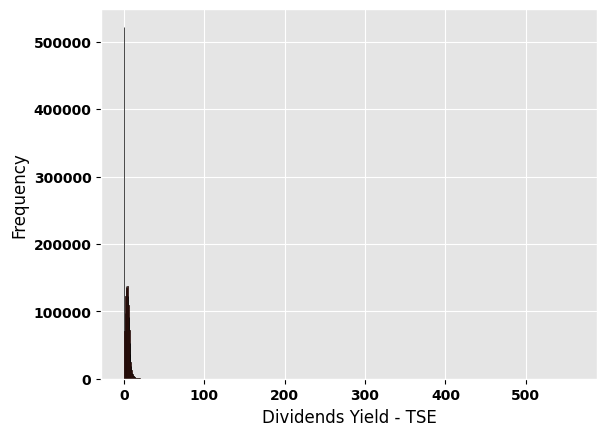

In [231]:
# Plot the distribution
plt.hist(df['股利殖利率-TSE'], bins=1000, edgecolor='black')

# Add labels and title
plt.xlabel('Dividends Yield - TSE')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [232]:
# 看一下99.5百分位數
outlier_threshold = df['股利殖利率-TSE'].quantile(0.995)
outlier_threshold

14.52

In [233]:
# 將所有 股利殖利率-TSE 大於 99.5 百分位數的值，都設定為 99.5 百分位數
df.loc[df['股利殖利率-TSE'] > outlier_threshold, '股利殖利率-TSE'] = outlier_threshold

In [234]:
# 可看到敘述統計中，最大值(Max)被限制在 99.5 百分位數
df['股利殖利率-TSE'].describe()

count    2.076441e+06
mean     3.408946e+00
std      2.922060e+00
min      0.000000e+00
25%      5.300000e-01
50%      3.190000e+00
75%      5.350000e+00
max      1.452000e+01
Name: 股利殖利率-TSE, dtype: float64

## 2.4 重複值處理

- 相對簡單的問題，但務必要注意。

- 在選擇保留哪一筆資料之前(keep first or last)，請先確認資料的順序。


In [235]:
# 檢視重複的資料
duplicates = df.duplicated()
df[duplicates]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
478449,1101 台泥,2020-01-02,32.264400,32.522202,32.264400,32.485401,18470,813465,0.9153,0.3379,...,0.8009,44.099998,48.500000,39.700001,NaN,NaN,NaN,TSE,44.049999,44.049999
476682,1101 台泥,2020-01-03,32.522202,32.595901,32.006599,32.374901,18387,807459,-0.3401,0.3364,...,1.8141,43.950001,48.299999,39.599998,NaN,NaN,NaN,TSE,43.900002,43.900002
474914,1101 台泥,2020-01-06,32.043400,32.190701,31.896099,32.006599,13867,602752,-1.1377,0.2537,...,0.9101,43.450001,47.750000,39.150002,NaN,NaN,NaN,TSE,43.400002,43.400002
473146,1101 台泥,2020-01-07,32.006599,32.117100,31.822399,32.117100,14185,616059,0.3452,0.2595,...,0.9206,43.599998,47.950001,39.250000,NaN,NaN,NaN,TSE,43.549999,43.549999
471378,1101 台泥,2020-01-08,31.785601,32.080200,31.785601,31.969700,13465,583893,-0.4587,0.2464,...,0.9174,43.400002,47.700001,39.099998,NaN,NaN,NaN,TSE,43.349998,43.349998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308743,9962 有益,2021-10-25,13.933000,14.315300,13.805600,13.933000,1101,18195,0.3058,1.2204,...,3.6697,16.400000,18.000000,14.800000,NaN,NaN,NaN,OTC,16.400000,16.400000
1306963,9962 有益,2021-10-26,14.230400,14.357800,13.805600,13.848100,1014,16771,-0.6098,1.1239,...,3.9634,16.299999,17.900000,14.700000,NaN,NaN,NaN,OTC,16.250000,16.250000
1305183,9962 有益,2021-10-27,14.060400,14.060400,13.550700,13.763100,777,12563,-0.6135,0.8612,...,3.6810,16.200001,17.799999,14.600000,NaN,NaN,NaN,OTC,16.150000,16.150000
1303403,9962 有益,2021-10-28,13.635700,13.890500,13.550700,13.635700,923,14869,-0.9259,1.0231,...,2.4691,16.049999,17.650000,14.450000,NaN,NaN,NaN,OTC,16.049999,16.049999


In [236]:
df[(df['證券代碼']=='1101 台泥') & (df['年月日']=='2020-01-02')]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
451941,1101 台泥,2020-01-02,32.2644,32.522202,32.2644,32.485401,18470,813465,0.9153,0.3379,...,0.8009,44.099998,48.5,39.700001,NaN,NaN,NaN,TSE,44.049999,44.049999
478449,1101 台泥,2020-01-02,32.2644,32.522202,32.2644,32.485401,18470,813465,0.9153,0.3379,...,0.8009,44.099998,48.5,39.700001,NaN,NaN,NaN,TSE,44.049999,44.049999


In [237]:
# 若當出現重複的行時，我們只保留最後一個
df_no_duplicates = df.drop_duplicates(keep='last')

# 也可以保留第一個
df_no_duplicates = df.drop_duplicates(keep='first')

df_no_duplicates[(df_no_duplicates['證券代碼']=='1101 台泥') & (df_no_duplicates['年月日']=='2020-01-02')]

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
451941,1101 台泥,2020-01-02,32.2644,32.522202,32.2644,32.485401,18470,813465,0.9153,0.3379,...,0.8009,44.099998,48.5,39.700001,NaN,NaN,NaN,TSE,44.049999,44.049999


In [238]:
# 如果只關心特定欄位中的重複值，可以在 duplicated() 和 drop_duplicates() 方法中指定欄位名。

# 以下例子代表每一天的股票代號和日期都不會重複
df_no_duplicates = df.drop_duplicates(subset=['證券代碼', '年月日'], keep='last')
df_no_duplicates

,證券代碼,年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股),成交值(千元),報酬率％,週轉率％,...,高低價差%,次日開盤參考價,次日漲停價,次日跌停價,注意股票(A),處置股票(D),全額交割(Y),市場別,最後揭示買價_fillna_1,最後揭示買價_fillna_2
35267,1101 台泥,2019-01-02,22.757299,22.884701,22.598200,22.598200,6566,234262,-0.2809,0.1285,...,1.2640,35.500000,39.049999,31.950001,NaN,NaN,NaN,TSE,35.500000,35.500000
33502,1101 台泥,2019-01-03,22.598200,22.661900,22.343599,22.375401,9160,323494,-0.9859,0.1793,...,1.4085,35.150002,38.650002,31.650000,NaN,NaN,NaN,TSE,35.150002,35.150002
31738,1101 台泥,2019-01-04,22.279900,22.693701,22.216299,22.566401,10692,376905,0.8535,0.2093,...,2.1337,35.450001,38.950001,31.950001,NaN,NaN,NaN,TSE,35.400002,35.400002
29975,1101 台泥,2019-01-07,22.820999,23.043800,22.789200,22.916500,14906,537441,1.5515,0.2918,...,1.1283,36.000000,39.599998,32.400002,NaN,NaN,NaN,TSE,36.000000,36.000000
28212,1101 台泥,2019-01-08,22.852800,22.884701,22.629999,22.629999,10987,393334,-1.2500,0.2151,...,1.1111,35.549999,39.099998,32.000000,NaN,NaN,NaN,TSE,35.549999,35.549999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115494,9962 有益,2023-08-17,17.049999,17.400000,17.000000,17.299999,159,2747,0.2899,0.1762,...,2.3188,17.299999,19.000000,15.600000,NaN,NaN,NaN,OTC,17.299999,17.299999
2117292,9962 有益,2023-08-18,17.299999,17.500000,17.250000,17.400000,231,4020,0.5780,0.2560,...,1.4451,17.400000,19.100000,15.700000,NaN,NaN,NaN,OTC,17.250000,17.250000
2119090,9962 有益,2023-08-21,17.400000,17.400000,17.100000,17.100000,90,1549,-1.7241,0.0998,...,1.7241,17.100000,18.799999,15.400000,NaN,NaN,NaN,OTC,17.100000,17.100000
2120889,9962 有益,2023-08-22,17.000000,17.000000,16.700001,16.799999,442,7446,-1.7544,0.4899,...,1.7544,16.799999,18.450001,15.150000,NaN,NaN,NaN,OTC,16.799999,16.799999


## 2.5 標準化、歸一化

1. 標準化將資料的平均值變為 0，標準差變為 1。
   - 在應用標準化之前，需確保數據的分佈不會因為極端值而受到過度的影響。
2. 歸一化則是將資料縮放到 0 ~ 1 之間。
   - 歸一化使得所有特徵都在相似的範圍內，有助於梯度下降等優化算法更快收斂。

In [239]:
# 假設我想要把 報酬率% 進行標準化
mean = df['報酬率％'].mean()
std = df['報酬率％'].std()

standardized_data = (df['報酬率％'] - mean) / std

standardized_data.head()

35267   -0.138486
33502   -0.417552
31738    0.310555
29975    0.586850
28212   -0.522093
Name: 報酬率％, dtype: float32

In [240]:
# 當我想要把多個欄位進行標準化時，可以使用函數 apply() 方法
def standardize(x):
    return (x - x.mean()) / x.std()

df[['報酬率％_標準化']] = df[['報酬率％']].apply(standardize)

df[['報酬率％', '報酬率％_標準化']]

,報酬率％,報酬率％_標準化
35267,-0.2809,-0.138486
33502,-0.9859,-0.417552
31738,0.8535,0.310555
29975,1.5515,0.586850
28212,-1.2500,-0.522093
...,...,...
2115494,0.2899,0.087460
2117292,0.5780,0.201501
2119090,-1.7241,-0.709761
2120889,-1.7544,-0.721755


In [241]:
# 檢查一下，是不是真的標準化了
df[['報酬率％', '報酬率％_標準化']].describe()

,報酬率％,報酬率％_標準化
count,2.122683e+06,2.122683e+06
mean,6.895293e-02,-8.728569e-09
std,2.526278e+00,1.000000e+00
min,-7.478040e+01,-2.962832e+01
25%,-8.757000e-01,-3.739308e-01
50%,0.000000e+00,-2.729428e-02
75%,8.403000e-01,3.053295e-01
max,1.903333e+02,7.531410e+01


## 2.6 課堂實作練習
  - 將`['高低價差%']` 資料進行歸一化，用函數apply() 的方式處理。

* 歸一化公式如下，其中 $X_{min}$ 和 $X_{max}$ 分別是資料的最小值和最大值。
- $X_{normalized} = (X - X_{min}) / (X_{max} - X_{min})$

In [242]:
# 運用apply()，將 高低價差& 進行歸一化


# 3.0 股票因子計算

## 3.1 價量因子 

In [243]:
# 讀入台股價量資料
df_price = pd.read_feather('./Data/價量資料.feather')
df_price.head()

,證券名稱,資料日,市場別,開盤價,最高價,最低價,收盤價,成交量(千股),成交金額(元),成交筆數,周轉率,流通在外股數(千股),個股市值(元),市值比重,成交金額比重,現金股利率(TEJ),本益比(TEJ),股價淨值比(TEJ),股價營收比(TEJ)
0,1101台泥,2018-01-02,TWSE,36.45,36.60,36.05,20.444681,13698.0,499370945.0,3932.0,0.3226,4246509.0,1.552099e+11,0.485348,0.522,3.45,20.26,1.38,1.63
1,1102亞泥,2018-01-02,TWSE,28.30,28.40,28.05,19.734614,6669.0,187956859.0,2492.0,0.1984,3361447.0,9.479281e+10,0.296421,0.196,3.19,19.28,0.75,1.52
2,1103嘉泥,2018-01-02,TWSE,13.35,13.45,13.15,10.054507,1007.0,13406478.0,346.0,0.1300,774781.0,1.042080e+10,0.032586,0.014,1.49,173.87,0.61,4.01
3,1104環泥,2018-01-02,TWSE,23.00,23.05,22.90,16.405601,344.0,7919719.0,184.0,0.0526,653609.0,1.503301e+10,0.047009,0.008,5.07,10.07,0.93,3.31
4,1108幸福,2018-01-02,TWSE,8.35,8.40,8.35,7.062476,95.0,799475.0,51.0,0.0235,404738.0,3.399799e+09,0.010631,0.001,7.14,52.41,0.75,0.92


In [244]:
df_price.columns

Index(['證券名稱', '資料日', '市場別', '開盤價', '最高價', '最低價', '收盤價', '成交量(千股)', '成交金額(元)',
       '成交筆數', '周轉率', '流通在外股數(千股)', '個股市值(元)', '市值比重', '成交金額比重', '現金股利率(TEJ)',
       '本益比(TEJ)', '股價淨值比(TEJ)', '股價營收比(TEJ)'],
      dtype='object')

### 歷史報酬因子: 過往5日報酬

In [245]:
df_mmt = df_price[['證券名稱','資料日','收盤價','個股市值(元)']]

# groupby:依照證券代碼分群 ； apply:套用計算函式 ； reset_index:groupby運算後回復原本排序
df_mmt['5日歷史報酬'] = df_mmt.groupby('證券名稱').apply(lambda x:x['收盤價'] / x['收盤價'].shift(5) - 1).reset_index(level=0,drop=True)

# 驗證結果
df_mmt[df_mmt['證券名稱'] == '1101台泥'].tail(10)

,證券名稱,資料日,收盤價,個股市值(元),5日歷史報酬
2321444,1101台泥,2023-11-17,33.20,2.506992e+11,0.010654
2323138,1101台泥,2023-11-20,33.60,2.537197e+11,0.024390
2324833,1101台泥,2023-11-21,34.20,2.582504e+11,0.052308
2326529,1101台泥,2023-11-22,33.85,2.556075e+11,0.021116
2328225,1101台泥,2023-11-23,34.00,2.567402e+11,0.028744
2329921,1101台泥,2023-11-24,33.75,2.548524e+11,0.016566
2331617,1101台泥,2023-11-27,33.95,2.563626e+11,0.010417
2333313,1101台泥,2023-11-28,34.50,2.605158e+11,0.008772
2335009,1101台泥,2023-11-29,34.25,2.586280e+11,0.011817
2336706,1101台泥,2023-11-30,34.95,2.639138e+11,0.027941


### 技術指標因子: 10日RSI指標

In [246]:
df_mmt['每日漲跌幅'] = df_mmt.groupby('證券名稱').apply(lambda x:x['收盤價'] - x['收盤價'].shift(1)).reset_index(level=0,drop=True)
df_mmt['每日漲幅'] = df_mmt['每日漲跌幅'].apply(lambda x:x if x > 0 else 0)
df_mmt['每日跌幅'] = df_mmt['每日漲跌幅'].apply(lambda x:x if x < 0 else 0)
df_mmt['10日平均漲幅'] = df_mmt.groupby('證券名稱')['每日漲幅'].rolling(10).mean().reset_index(level=0,drop=True)
df_mmt['10日平均跌幅'] = df_mmt.groupby('證券名稱')['每日跌幅'].rolling(10).mean().reset_index(level=0,drop=True)
df_mmt['10日RS'] = df_mmt['10日平均漲幅'] / abs(df_mmt['10日平均跌幅'])
df_mmt['10日RSI'] = (df_mmt['10日RS'] / (1 + df_mmt['10日RS'])) *100

# 驗證結果
df_mmt[df_mmt['證券名稱'] == '1101台泥'].tail(15)

,證券名稱,資料日,收盤價,個股市值(元),5日歷史報酬,每日漲跌幅,每日漲幅,每日跌幅,10日平均漲幅,10日平均跌幅,10日RS,10日RSI
2312974,1101台泥,2023-11-10,32.85,2.480563e+11,-0.001520,-0.05,0.00,-0.05,0.155,-0.055,2.818182,73.809524
2314668,1101台泥,2023-11-13,32.80,2.476788e+11,0.000000,-0.05,0.00,-0.05,0.140,-0.060,2.333333,70.000000
2316362,1101台泥,2023-11-14,32.50,2.454134e+11,-0.001536,-0.30,0.00,-0.30,0.115,-0.090,1.277778,56.097561
2318056,1101台泥,2023-11-15,33.15,2.503217e+11,0.007599,0.65,0.65,0.00,0.180,-0.075,2.400000,70.588235
2319750,1101台泥,2023-11-16,33.05,2.495666e+11,0.004559,-0.10,0.00,-0.10,0.155,-0.085,1.823529,64.583333
2321444,1101台泥,2023-11-17,33.20,2.506992e+11,0.010654,0.15,0.15,0.00,0.115,-0.085,1.352941,57.500000
2323138,1101台泥,2023-11-20,33.60,2.537197e+11,0.024390,0.40,0.40,0.00,0.155,-0.075,2.066667,67.391304
2324833,1101台泥,2023-11-21,34.20,2.582504e+11,0.052308,0.60,0.60,0.00,0.215,-0.050,4.300000,81.132075
2326529,1101台泥,2023-11-22,33.85,2.556075e+11,0.021116,-0.35,0.00,-0.35,0.180,-0.085,2.117647,67.924528
2328225,1101台泥,2023-11-23,34.00,2.567402e+11,0.028744,0.15,0.15,0.00,0.195,-0.085,2.294118,69.642857


## 3.2 籌碼因子 

In [247]:
# 讀入台股籌碼資料
df_chip = pd.read_feather('./Data/籌碼資料.feather')
df_chip.head()

,證券名稱,資料日,市場別,外資買進張數,外資賣出張數,外資買賣超張數,外資買進金額(元),外資賣出金額(元),外資買賣超金額(元),外資持股率,...,融券餘額(元),資券比,資券互抵,資券互抵(元),借券賣出,借券賣出(元),借券餘額,借券餘額(元),當沖成交股數(千股),當沖買賣占比
0,1101台泥,2018-01-02,TWSE,3969.0,3563.0,406.0,145067.0,130228.0,14839.0,32.54,...,18408.87,6.66,0.0,0.0,19.0,692.61,15016.0,547381.25,558.0,4.07
1,1102亞泥,2018-01-02,TWSE,1091.0,73.0,1019.0,30766.0,2059.0,28736.0,19.42,...,1916.25,1.82,0.0,0.0,1.0,28.18,7239.0,203995.74,329.0,4.93
2,1103嘉泥,2018-01-02,TWSE,1.0,114.0,-113.0,13.0,1533.0,-1520.0,3.08,...,465.71,0.95,0.0,0.0,0.0,0.00,1580.0,21023.64,53.0,5.26
3,1104環泥,2018-01-02,TWSE,132.0,112.0,20.0,3036.0,2576.0,460.0,17.97,...,68.97,0.20,0.0,0.0,0.0,0.00,841.0,19333.58,0.0,0.00
4,1108幸福,2018-01-02,TWSE,0.0,0.0,0.0,0.0,0.0,0.0,2.35,...,0.00,0.00,0.0,0.0,0.0,0.00,667.0,5593.13,0.0,0.00


In [248]:
df_chip.columns

Index(['證券名稱', '資料日', '市場別', '外資買進張數', '外資賣出張數', '外資買賣超張數', '外資買進金額(元)',
       '外資賣出金額(元)', '外資買賣超金額(元)', '外資持股率', '投信買進張數', '投信賣出張數', '投信買賣超張數',
       '投信買進金額(元)', '投信賣出金額(元)', '投信買賣超金額(元)', '投信持股率', '自營商買進張數(自行)',
       '自營商賣出張數(自行)', '自營買賣超張數(自行)', '自營商買進金額(自行)', '自營商賣出金額(自行)',
       '自營買賣超金額(自行)', '自營商買進張數(避險)', '自營商賣出張數(避險)', '自營買賣超張數(避險)',
       '自營商買進金額(避險)', '自營商賣出金額(避險)', '自營買賣超金額(避險)', '自營商持股率', '合計買進張數',
       '合計賣出張數', '合計買賣超張數', '合計買進金額(元)', '合計賣出金額(元)', '合計買賣超金額(元)', '融資買進',
       '融資賣出', '融資餘額', '融資餘額(元)', '融券買進', '融券賣出', '融券餘額', '融券餘額(元)', '資券比',
       '資券互抵', '資券互抵(元)', '借券賣出', '借券賣出(元)', '借券餘額', '借券餘額(元)', '當沖成交股數(千股)',
       '當沖買賣占比'],
      dtype='object')

### 三大法人買賣超因子

In [249]:
df_chip['三大法人買賣超金額'] = df_chip['外資買賣超金額(元)'] + df_chip['投信買賣超金額(元)'] + df_chip['自營買賣超金額(自行)'] + df_chip['自營買賣超金額(避險)'] 

# 驗證計算結果
df_chip[['證券名稱', '資料日','外資買賣超金額(元)','投信買賣超金額(元)','自營買賣超金額(自行)','自營買賣超金額(避險)','三大法人買賣超金額','合計買賣超金額(元)']]

,證券名稱,資料日,外資買賣超金額(元),投信買賣超金額(元),自營買賣超金額(自行),自營買賣超金額(避險),三大法人買賣超金額,合計買賣超金額(元)
0,1101台泥,2018-01-02,14839.0,26755.0,14035.0,-2010.0,53619.0,53619.0
1,1102亞泥,2018-01-02,28736.0,649.0,761.0,0.0,30146.0,30146.0
2,1103嘉泥,2018-01-02,-1520.0,0.0,0.0,0.0,-1520.0,-1520.0
3,1104環泥,2018-01-02,460.0,0.0,0.0,0.0,460.0,460.0
4,1108幸福,2018-01-02,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2338396,9951皇田,2023-11-30,1950.0,0.0,0.0,0.0,1950.0,1950.0
2338397,9955佳龍,2023-11-30,-647.0,0.0,0.0,0.0,-647.0,-647.0
2338398,9958世紀鋼,2023-11-30,50393.0,0.0,-1162.0,4316.0,53547.0,53574.0
2338399,9960邁達康,2023-11-30,0.0,0.0,0.0,0.0,0.0,0.0


## 3.3 月營收因子 
有季節性
公告日調整

In [250]:
# 讀入台股月營收資料
df_sales = pd.read_feather('./Data/月營收資料.feather')
df_sales.drop_duplicates(subset=['證券名稱','營收發布日'],inplace=True)
df_sales = df_sales.reset_index(drop=True)
df_sales.head()

,證券名稱,年月,營收發布日,單月營收(千元),去年單月營收(千元),單月營收成長率％,單月營收與上月比％,累計營收(千元),去年累計營收(千元),累計營收成長率％,...,與歷史最高單月營收比%,歷史最低單月營收(千元),與歷史最低單月營收比%,近12月累計營收(千元),去年近12月累計營收(千元),近12月累計營收成長率％,近 3月累計營收(千元),去年近 3月累計營收(千元),近3月累計營收成長率％,近3月累計營收與上月比％
0,1101台泥,2018-01-01,2018-02-12,9617393.0,6131670.0,56.85,-12.47,9617393.0,6131670.0,56.85,...,-16.82,3632053.0,164.79,101799228.0,89127748.0,14.22,30591439.0,24417239.0,25.29,4.19
1,1102亞泥,2018-01-01,2018-02-09,6769986.0,4162130.0,62.66,-4.25,6769986.0,4162130.0,62.66,...,-10.78,2552357.0,165.24,67507039.0,60068678.0,12.38,20479859.0,15517862.0,31.98,4.76
2,1103嘉泥,2018-01-01,2018-02-12,172094.0,232657.0,-26.03,-4.98,172094.0,232657.0,-26.03,...,-83.36,132940.0,29.45,2035321.0,3175398.0,-35.90,535074.0,969076.0,-44.79,0.89
3,1104環泥,2018-01-01,2018-02-09,460482.0,363865.0,26.55,15.18,460482.0,363865.0,26.55,...,-16.62,293590.0,56.85,4501993.0,4612753.0,-2.40,1241843.0,1238222.0,0.29,11.12
4,1108幸福,2018-01-01,2018-02-09,320340.0,316773.0,1.13,9.87,320340.0,316773.0,1.13,...,-38.26,232100.0,38.02,3406838.0,4219568.0,-19.26,870824.0,1010162.0,-13.79,7.47


In [251]:
df_sales.columns

Index(['證券名稱', '年月', '營收發布日', '單月營收(千元)', '去年單月營收(千元)', '單月營收成長率％',
       '單月營收與上月比％', '累計營收(千元)', '去年累計營收(千元)', '累計營收成長率％', '歷史最高單月營收(千元)',
       '與歷史最高單月營收比%', '歷史最低單月營收(千元)', '與歷史最低單月營收比%', '近12月累計營收(千元)',
       '去年近12月累計營收(千元)', '近12月累計營收成長率％', '近 3月累計營收(千元)', '去年近 3月累計營收(千元)',
       '近3月累計營收成長率％', '近3月累計營收與上月比％'],
      dtype='object')

### 月營收MoM因子

In [252]:
df_sales['月營收_MoM'] = df_sales.groupby('證券名稱').apply(lambda x: (x['單月營收(千元)'] - x['單月營收(千元)'].shift(1)) / x['單月營收(千元)'].shift(1)).reset_index(level=0,drop=True)

# 驗證計算結果
df_sales[df_sales['證券名稱'] == '1101台泥'][['證券名稱', '營收發布日', '單月營收(千元)', '月營收_MoM', '單月營收與上月比％']].tail()

,證券名稱,營收發布日,單月營收(千元),月營收_MoM,單月營收與上月比％
120833,1101台泥,2023-07-10,8816109.0,-0.081281,-8.13
122835,1101台泥,2023-08-10,8953462.0,0.015580,1.56
124844,1101台泥,2023-09-11,9379408.0,0.047573,4.76
126856,1101台泥,2023-10-11,8735157.0,-0.068688,-6.87
128873,1101台泥,2023-11-10,9371746.0,0.072877,7.29


### 月營收YoY因子

In [253]:
df_sales['月營收_YoY'] = df_sales.groupby('證券名稱').apply(lambda x: (x['單月營收(千元)'] - x['單月營收(千元)'].shift(12)) / x['單月營收(千元)'].shift(12)).reset_index(level=0,drop=True)

# 驗證計算結果
df_sales[df_sales['證券名稱'] == '1101台泥'][['證券名稱', '營收發布日', '單月營收(千元)', '月營收_YoY', '單月營收成長率％']].tail()

,證券名稱,營收發布日,單月營收(千元),月營收_YoY,單月營收成長率％
120833,1101台泥,2023-07-10,8816109.0,-0.036068,-3.61
122835,1101台泥,2023-08-10,8953462.0,-0.113735,-11.37
124844,1101台泥,2023-09-11,9379408.0,-0.122588,-12.26
126856,1101台泥,2023-10-11,8735157.0,-0.160477,-16.05
128873,1101台泥,2023-11-10,9371746.0,-0.175610,-17.56


## 3.4 財報因子 

In [254]:
# 讀入台股季財報資料
df_fin = pd.read_feather('./Data/季財報資料.feather')
df_fin.drop_duplicates(subset=['證券名稱','編表日'],inplace=True)
df_fin = df_fin.reset_index(drop=True)
df_fin.head()

,證券名稱,年/月,期間別,序號,季別,合併(Y/N),幣別,編表日,產業別,現金及約當現金,...,固定資產週轉率,期末收帳天數,期末付帳天數,期末售貨天數,每股淨值,每股營業收入,每股營業利益,每股稅前淨利,每股稅後淨利,每人營收
0,1101台泥,2018-03-01,Q,001,1,Y,TWD,2018-05-15,F,24192833.0,...,0.19,227.60,37.62,45.58,35.21,5.69,1.10,1.09,0.67,2584.35
1,1102亞泥,2018-03-01,Q,001,1,Y,TWD,2018-05-15,F,10204539.0,...,0.29,143.69,47.32,47.76,38.54,5.31,0.80,0.91,0.72,2991.07
2,1103嘉泥,2018-03-01,Q,001,1,Y,TWD,2018-05-14,F,1498081.0,...,0.15,35.59,39.75,155.75,23.51,0.61,-0.07,0.25,0.21,2076.02
3,1104環泥,2018-03-01,Q,001,1,Y,TWD,2018-05-14,F,228393.0,...,0.18,75.41,42.91,26.81,26.89,1.78,0.08,0.02,0.00,NaN
4,1108幸福,2018-03-01,Q,001,1,Y,TWD,2018-05-15,F,199622.0,...,0.51,67.40,42.44,411.16,10.84,2.06,-0.09,-0.08,-0.02,1682.23


In [255]:
for c in df_fin.columns:
    print(c)

證券名稱
年/月
期間別
序號
季別
合併(Y/N)
幣別
編表日
產業別
現金及約當現金
應收帳款
長期應收款
存貨
應付帳款
固定資產
無形資產
預付款
其他應收款
預收款_流動
其他應付款
預收款_非流動
金融借款_流動
金融借款_非流動
非金融借款_流動
非金融借款_非流動
普通股股本
資本公積
保留盈餘
特別股股本
非控制權益
其他權益
流動資產合計
非流動資產合計
資產總計
流動負債合計
非流動負債合計
負債總額
股東權益總計
負債及股東權益總計
長短期借款
速動資產
生財設備
長短期應收帳款
營業收入
營業成本
營業費用
所得稅費用
利息收入
利息支出
稅前淨利
稅後淨利
母公司淨利
每股盈餘
特別股股息
營業毛利
營業利益
非常續性利益
常續性利益
營業外收入及支出
稅前息前淨利
折舊及攤提
營運產生現金流量
投資產生現金流量
融資產生現金流量
員工人數
期末股數
加權平均股數
稅率
常續ROE
常續ROA
營業毛利率
營業利益率
稅前淨利率
稅後淨利率
營業費用率
業外收支率
營收成長率
營業毛利成長率
營業利益成長率
稅前淨利成長率
稅後淨利成長率
資產成長率
淨值成長率
固定資產成長率
速動比率
流動比率
現金流量比率
負債比率
利息支出率
利息保障倍數
借款依存度
應收帳款週轉率
應付帳款週轉率
存貨週轉率
總資產週轉率
淨值週轉率
固定資產週轉率
期末收帳天數
期末付帳天數
期末售貨天數
每股淨值
每股營業收入
每股營業利益
每股稅前淨利
每股稅後淨利
每人營收


### 營業利益率YoY

In [256]:
df_fin['營利率'] = df_fin['營業利益'] / df_fin['營業收入']
df_fin['營利率_YoY'] = df_fin.groupby('證券名稱').apply(lambda x: (x['營利率'] - x['營利率'].shift(4)) / x['營利率'].shift(4)).reset_index(level=0,drop=True)

# 驗證計算結果
df_fin[df_fin['證券名稱'] == '1101台泥'][['證券名稱', '編表日','營業利益率', '營利率', '營利率_YoY']].head()

,證券名稱,編表日,營業利益率,營利率,營利率_YoY
0,1101台泥,2018-05-15,19.23,0.192343,NaN
1558,1101台泥,2018-08-10,26.95,0.269468,NaN
3123,1101台泥,2018-11-13,22.85,0.228461,NaN
4695,1101台泥,2019-03-23,20.62,0.206216,NaN
6274,1101台泥,2019-05-10,19.85,0.198489,0.031958


## 3.5 課堂實作練習
  - 計算財報因子中的 `'毛利率QoQ'` 因子 :
      1. 計算毛利率 : 營業毛利 / 營業收入
      2. 計算毛利率QoQ : (毛利率 - 前一季毛利率) / 前一季毛利率  
      <br>
  - 計算月營收因子中的 `'近3月營收YoY'` 因子 :
      1. 計算近3月營收總合 : ['單月營收(千元)'].rolling(3).sum()
      2. 計算近3月營收YoY : (近3月營收 - 12個月前的近3月營收) / 12個月前的近3月營收

In [257]:
# 計算毛利率QoQ
df_fin['毛利率'] = df_fin['營業毛利'] / df_fin['營業收入']
df_fin['毛利率_QoQ'] = df_fin.groupby('證券名稱').apply(lambda x: (x['毛利率'] - x['毛利率'].shift(1)) / x['毛利率'].shift(1)).reset_index(level=0,drop=True)

# 驗證計算結果
df_fin[df_fin['證券名稱'] == '1101台泥'][['證券名稱', '編表日','營業毛利率', '毛利率', '毛利率_QoQ']].head()

,證券名稱,編表日,營業毛利率,毛利率,毛利率_QoQ
0,1101台泥,2018-05-15,23.95,0.239488,NaN
1558,1101台泥,2018-08-10,30.82,0.308175,0.286807
3123,1101台泥,2018-11-13,26.76,0.267599,-0.131665
4695,1101台泥,2019-03-23,25.55,0.255514,-0.045161
6274,1101台泥,2019-05-10,25.59,0.255868,0.001383


In [258]:
# 計算近3月營收YoY
df_sales['近3月營收'] = df_sales.groupby('證券名稱')['單月營收(千元)'].rolling(3).sum().reset_index(level=0,drop=True)
df_sales['近3月營收_YoY'] = df_sales.groupby('證券名稱').apply(lambda x: (x['近3月營收'] - x['近3月營收'].shift(12)) / x['近3月營收'].shift(12)).reset_index(level=0,drop=True)

# 驗證計算結果
df_sales[df_sales['證券名稱'] == '1101台泥'][['證券名稱', '營收發布日',  '近3月營收', '近3月營收_YoY', '近3月累計營收成長率％']].tail()

,證券名稱,營收發布日,近3月營收,近3月營收_YoY,近3月累計營收成長率％
120833,1101台泥,2023-07-10,27512319.0,0.091797,9.18
122835,1101台泥,2023-08-10,27365662.0,0.014210,1.42
124844,1101台泥,2023-09-11,27148979.0,-0.093169,-9.32
126856,1101台泥,2023-10-11,27068027.0,-0.132358,-13.24
128873,1101台泥,2023-11-10,27486311.0,-0.153300,-15.33


# 4.0 多因子選股

 - 每月第一個交易日換倉

In [259]:
# 列出多因子欄位
df_mmt_s = df_mmt[['證券名稱', '資料日','5日歷史報酬','10日RSI','個股市值(元)']]
df_chip_s = df_chip[['證券名稱', '資料日','三大法人買賣超金額']]
df_sales_s = df_sales[['證券名稱', '營收發布日', '月營收_YoY']]
df_fin_s = df_fin[['證券名稱', '編表日','營利率_YoY']]

## 4.1 合併各類因子資料

In [260]:
# 將價量以外因子(籌碼、月營收、財報因子)，mapping至日頻率
df_chip_s['資料日'] = pd.to_datetime(df_chip_s['資料日'])
df_chip_s.set_index('資料日', inplace=True)
df_chip_s = df_chip_s.groupby('證券名稱').resample('D').ffill().reset_index(level=0,drop=True)
df_chip_s = df_chip_s.sort_values(by=['證券名稱','資料日']).reset_index()

df_sales_s['營收發布日'] = pd.to_datetime(df_sales_s['營收發布日'])
df_sales_s.set_index('營收發布日', inplace=True)
df_sales_s = df_sales_s.groupby('證券名稱').resample('D').ffill().reset_index(level=0,drop=True)
df_sales_s = df_sales_s.sort_values(by=['證券名稱','營收發布日']).reset_index()

df_fin_s['編表日'] = pd.to_datetime(df_fin_s['編表日'])
df_fin_s.set_index('編表日', inplace=True)
df_fin_s = df_fin_s.groupby('證券名稱').resample('D').ffill().reset_index(level=0,drop=True)
df_fin_s = df_fin_s.sort_values(by=['證券名稱','編表日']).reset_index()

df_fin_s

,編表日,證券名稱,營利率_YoY
0,2018-05-15,1101台泥,NaN
1,2018-05-16,1101台泥,NaN
2,2018-05-17,1101台泥,NaN
3,2018-05-18,1101台泥,NaN
4,2018-05-19,1101台泥,NaN
...,...,...,...
3238703,2023-11-09,9962有益,-0.501382
3238704,2023-11-10,9962有益,-0.501382
3238705,2023-11-11,9962有益,-0.501382
3238706,2023-11-12,9962有益,-0.501382


In [261]:
# 以價量資料(台股交易日)為基準，合併不同頻率之資料
df_all_factor = df_mmt_s.copy()

# merge: 合併兩個dataframe，on=合併基準欄位，how=以哪個dataframe為準)
df_all_factor = pd.merge(df_all_factor, df_chip_s, on=['證券名稱', '資料日'], how='left')
df_all_factor = pd.merge(df_all_factor, df_sales_s, left_on=['證券名稱', '資料日'], right_on=['證券名稱', '營收發布日'], how='left')
df_all_factor = pd.merge(df_all_factor, df_fin_s, left_on=['證券名稱', '資料日'], right_on=['證券名稱', '編表日'], how='left')
df_all_factor.drop(columns=['營收發布日','編表日'],inplace=True)

df_all_factor

,證券名稱,資料日,5日歷史報酬,10日RSI,個股市值(元),三大法人買賣超金額,月營收_YoY,營利率_YoY
0,1101台泥,2018-01-02,NaN,NaN,1.552099e+11,53619.0,NaN,NaN
1,1102亞泥,2018-01-02,NaN,NaN,9.479281e+10,30146.0,NaN,NaN
2,1103嘉泥,2018-01-02,NaN,NaN,1.042080e+10,-1520.0,NaN,NaN
3,1104環泥,2018-01-02,NaN,NaN,1.503301e+10,460.0,NaN,NaN
4,1108幸福,2018-01-02,NaN,NaN,3.399799e+09,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
2338398,9951皇田,2023-11-30,0.012987,51.162791,5.842200e+09,1950.0,NaN,NaN
2338399,9955佳龍,2023-11-30,0.052854,66.153846,2.569885e+09,-647.0,NaN,NaN
2338400,9958世紀鋼,2023-11-30,0.012195,43.750000,3.917132e+10,53547.0,NaN,NaN
2338401,9960邁達康,2023-11-30,-0.007366,41.176471,9.053180e+08,0.0,NaN,NaN


In [262]:
# 把inf(除以0)填補成缺失值，以利後續一併刪除
df_all_factor.replace([np.inf, -np.inf], np.NaN, inplace=True)

# 刪除含有缺失值之資料行
df_all_factor.dropna(inplace=True)
df_all_factor = df_all_factor.sort_values(by=['證券名稱','資料日']).reset_index(level=0,drop=True)
df_all_factor

,證券名稱,資料日,5日歷史報酬,10日RSI,個股市值(元),三大法人買賣超金額,月營收_YoY,營利率_YoY
0,1101台泥,2019-05-10,-0.008168,61.290323,2.170925e+11,-9988.0,-0.038746,0.031958
1,1101台泥,2019-05-13,-0.007092,53.521127,2.145385e+11,-130578.0,-0.038746,0.031958
2,1101台泥,2019-05-14,-0.031469,42.465753,2.122399e+11,-132918.0,-0.038746,0.031958
3,1101台泥,2019-05-15,-0.029070,46.666667,2.132615e+11,-242818.0,-0.038746,0.031958
4,1101台泥,2019-05-16,-0.011765,47.368421,2.145385e+11,50148.0,-0.038746,0.031958
...,...,...,...,...,...,...,...,...
1731069,9962有益,2023-11-07,0.026087,77.777778,1.596899e+09,372.0,-0.235536,-0.501382
1731070,9962有益,2023-11-08,0.020408,57.894737,1.578855e+09,193.0,-0.235536,-0.501382
1731071,9962有益,2023-11-09,0.011594,57.894737,1.574344e+09,-925.0,-0.235536,-0.501382
1731072,9962有益,2023-11-10,0.002882,55.000000,1.569833e+09,-400.0,-0.235536,-0.501382


## 4.2 設定選股規則

In [263]:
# 依據各指標特性，制定篩選規則

# 依據指標大小排序(數值越大，排名越小)
df_select = df_all_factor.copy()
df_select['個股市值_排名'] = df_select.groupby('資料日')['個股市值(元)'].rank(ascending=False)
# df_select['5日歷史報酬_排名'] = df_select.groupby('資料日')['5日歷史報酬'].rank(ascending=False)
# df_select['三大法人買賣超金額_排名'] = df_select.groupby('資料日')['三大法人買賣超金額'].rank(ascending=False)

# 1.市值前500大公司 
df_select = df_select[df_select['個股市值_排名'] <= 500]

# 2.月營收和營利率需正成長
df_select = df_select[(df_all_factor['月營收_YoY']>0) & (df_all_factor['營利率_YoY']>0)]

# 3.按5日歷史報酬排序，每月選出前10名個股
df_select = df_select.groupby('資料日').apply(lambda x: x.sort_values(by='5日歷史報酬', ascending=False).head(10))

df_select.reset_index(drop=True, inplace=True)

# 抽樣驗證
df_select[df_select['資料日']=='2023-11-01']


,證券名稱,資料日,5日歷史報酬,10日RSI,個股市值(元),三大法人買賣超金額,月營收_YoY,營利率_YoY,個股市值_排名
11024,2850新產,2023-11-01,0.070513,66.279070,2.110635e+10,3273.0,0.064603,0.543834,251.0
11025,6189豐藝,2023-11-01,0.068702,82.500000,1.189616e+10,16800.0,0.378626,0.208998,386.0
11026,2707晶華,2023-11-01,0.052632,59.493671,2.675468e+10,-31520.0,0.105554,1.534340,204.0
11027,4105東洋,2023-11-01,0.050995,89.855072,2.101092e+10,52390.0,0.102969,0.036387,253.0
11028,6806森崴能源,2023-11-01,0.040000,67.058824,2.247960e+10,82399.0,2.970293,0.277944,232.0
11029,6291沛亨,2023-11-01,0.039801,61.467890,8.778000e+09,627.0,0.833595,2.327354,494.0
11030,2618長榮航,2023-11-01,0.038113,71.739130,1.544417e+11,168585.0,0.448376,1.158381,47.0
11031,2610華航,2023-11-01,0.033592,60.377358,1.210223e+11,-361886.0,0.241698,2.876782,62.0
11032,2211長榮鋼,2023-11-01,0.032857,78.571429,3.015571e+10,75810.0,0.267030,0.505564,179.0
11033,4904遠傳,2023-11-01,0.022636,68.181818,2.502529e+11,72257.0,0.016588,0.057583,29.0


In [264]:
# 每日選股名單
df_select_d = df_select[['資料日','證券名稱']].sort_values(by=['資料日','證券名稱'])

# 每月第一個交易日之選股名單
df_select_d['年月'] = df_select_d['資料日'].dt.strftime('%Y-%m')
reb_date = df_select_d[['年月','資料日']].sort_values(by='資料日').drop_duplicates(subset=['年月'], keep = 'first').reset_index(drop=True)
df_select_m = df_select_d[df_select_d['資料日'].isin(reb_date['資料日'])].copy().reset_index(drop=True)

df_select_m

,資料日,證券名稱,年月
0,2019-04-25,3529力旺,2019-04
1,2019-04-25,6176瑞儀,2019-04
2,2019-04-25,6263普萊德,2019-04
3,2019-04-25,8928鉅明,2019-04
4,2019-05-02,2065世豐,2019-05
...,...,...,...
549,2023-11-01,4105東洋,2023-11
550,2023-11-01,4904遠傳,2023-11
551,2023-11-01,6189豐藝,2023-11
552,2023-11-01,6291沛亨,2023-11


## 4.3 課堂實作練習
  - 結合前一節課堂練習中計算的因子，進行以下篩選 :
      1. `市值`大小為每期500~1000名
      2. `毛利率QoQ` > 0
      3. `近3月營收YoY` > 0
      4. 按`5日歷史報酬`排序，每月選出前10名個股
      5. 取出每月第一個交易日的選股名單

# 5.0 簡易版回測

In [265]:
# 讀取價格資料，進行整理
df = pd.read_feather('./Data/價量資料.feather')
df.sort_values(by=['證券名稱', '資料日'], ascending=True, inplace=True)
df.drop_duplicates(subset=['證券名稱', '資料日'], keep='last', inplace=True)
df['資料日'] = pd.to_datetime(df['資料日'])
df.set_index('資料日', inplace=True)
df.head()


,證券名稱,市場別,開盤價,最高價,最低價,收盤價,成交量(千股),成交金額(元),成交筆數,周轉率,流通在外股數(千股),個股市值(元),市值比重,成交金額比重,現金股利率(TEJ),本益比(TEJ),股價淨值比(TEJ),股價營收比(TEJ)
資料日,,,,,,,,,,,,,,,,,,
2018-01-02,1101台泥,TWSE,36.45,36.60,36.05,20.444681,13698.0,4.993709e+08,3932.0,0.3226,4246509.0,1.552099e+11,0.485348,0.522,3.45,20.26,1.38,1.63
2018-01-03,1101台泥,TWSE,36.50,37.35,36.25,20.892171,19959.0,7.373536e+08,5001.0,0.4700,4246509.0,1.586071e+11,0.491803,0.565,3.38,20.71,1.41,1.66
2018-01-04,1101台泥,TWSE,37.35,37.45,36.75,20.808266,14927.0,5.553930e+08,5698.0,0.3515,4246509.0,1.579701e+11,0.487705,0.414,3.39,20.62,1.41,1.65
2018-01-05,1101台泥,TWSE,37.50,37.50,37.05,20.864203,35536.0,1.325927e+09,7554.0,0.8368,4246509.0,1.583948e+11,0.487621,0.992,3.38,20.68,1.41,1.66
2018-01-08,1101台泥,TWSE,37.40,38.30,37.20,21.367628,22660.0,8.585742e+08,7513.0,0.5336,4246509.0,1.622166e+11,0.497755,0.659,3.30,21.18,1.45,1.70


## 5.1 選股投組回測

In [266]:
# 每月底收盤價
monthly_end_price = df.groupby('證券名稱').resample('M')['收盤價'].last().unstack().transpose()

# 月底到下個月底的報酬
monthly_returns = monthly_end_price.pct_change()

print(monthly_returns.shape)
monthly_returns.head()

(71, 1759)


證券名稱,1101台泥,1102亞泥,1103嘉泥,1104環泥,1108幸福,1109信大,1110東泥,1201味全,1203味王,1210大成,...,9944新麗,9945潤泰新,9946三發地產,9949琉園,9950萬國通,9951皇田,9955佳龍,9958世紀鋼,9960邁達康,9962有益
資料日,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.017264,-0.054908,-0.066421,-0.017505,-0.023557,0.036232,0.000000,-0.044681,-0.024299,-0.001471,...,0.007614,-0.038864,-0.011538,-0.036364,-0.054945,-0.036424,-0.120000,0.431844,-0.04721,0.023923
2018-03-31,-0.012162,0.005282,-0.079051,-0.006682,-0.061520,-0.010490,0.000000,0.089087,0.007663,0.017673,...,-0.015113,0.060653,0.031128,-0.018868,0.027132,-0.044674,0.045455,0.288000,0.04955,0.000000
2018-04-30,0.117647,0.112084,0.025751,-0.013453,-0.020566,-0.024735,-0.003571,-0.036810,-0.020913,0.109986,...,-0.015345,0.045455,0.101887,0.009615,-0.083019,0.003597,0.000000,-0.091925,-0.09299,0.028037
2018-05-31,0.067319,0.040945,0.112971,-0.040909,0.065617,0.000000,-0.007168,0.014862,0.001942,0.010430,...,-0.010390,0.014025,-0.034247,-0.038095,0.032922,-0.150538,-0.057971,-0.324897,-0.05205,-0.009091


In [267]:
# 設定回測期間
start_dt = '2020-01-01'
end_dt = '2023-11-30'

# 換倉日
reb_date = df_select_m[(df_select_m['資料日'] > start_dt) & (df_select_m['資料日'] < end_dt)]['資料日'].unique()
print(len(reb_date))

# 計算投組每月報酬
portfolio_return = []
for i in range(len(reb_date)):
    reb_ticker_list = df_select_m[df_select_m['資料日'] == reb_date[i]]['證券名稱'].values
    mean_return = np.mean(monthly_returns[reb_ticker_list].loc[reb_date[i] + MonthEnd(n=0)])
    portfolio_return.append(mean_return)
    
# 計算投組累積報酬
portfolio_return[0] = 0
portfolio_return = np.array(portfolio_return) + 1
portfolio_cumulative_return = portfolio_return.cumprod()

df_portfolio_tr = pd.DataFrame(index = reb_date)
df_portfolio_tr['Portfolio Return'] = portfolio_return - 1
df_portfolio_tr['Portfolio Total Return'] = portfolio_cumulative_return
df_portfolio_tr.head()

47


,Portfolio Return,Portfolio Total Return
2020-01-02,0.000000,1.000000
2020-02-03,0.011063,1.011063
2020-03-02,-0.056460,0.953979
2020-04-01,0.229684,1.173093
2020-05-04,0.267046,1.486363


## 5.2 加權報酬指數回測(Benchmark)

In [268]:
# 讀取Benchmark資料
benchmark = pd.read_feather('./Data/加權報酬指數.feather')
benchmark.set_index('資料日',inplace=True)
benchmark.index = pd.to_datetime(benchmark.index)

# 每月底收盤價
monthly_end_price_bm = benchmark.resample('M')['收盤價'].last()

# 月底到下個月底的報酬
monthly_returns_bm = monthly_end_price_bm.pct_change()

monthly_returns_bm = monthly_returns_bm.loc[[i + MonthEnd(n=0)for i in reb_date]]

# 計算Benchmark累積報酬
monthly_returns_bm[0] = 0
monthly_returns_bm = monthly_returns_bm + 1


bm_portfolio_tr = monthly_returns_bm.cumprod()

df_benchmark_tr = pd.DataFrame(index = reb_date)
df_benchmark_tr['Benchmark Return'] = monthly_returns_bm.values - 1
df_benchmark_tr['Benchmark Total Return'] = bm_portfolio_tr.values
df_benchmark_tr

print(len(df_benchmark_tr))
df_benchmark_tr.head()


47


,Benchmark Return,Benchmark Total Return
2020-01-02,0.000000,1.000000
2020-02-03,-0.017621,0.982379
2020-03-02,-0.138174,0.846640
2020-04-01,0.132562,0.958872
2020-05-04,-0.004498,0.954560


## 績效呈現

,Portfolio Total Return,Benchmark Total Return
最大回撤,-0.385261,-0.256325
累積報酬,7.291586,1.749938
年化報酬,0.660714,0.153582
Sharpe Ratio,1.379104,0.768531


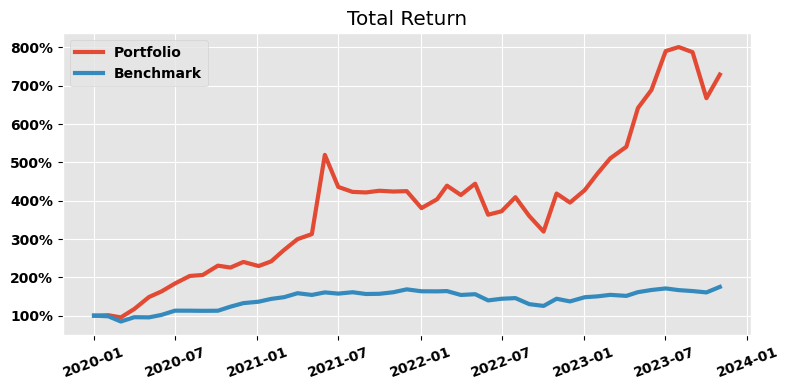

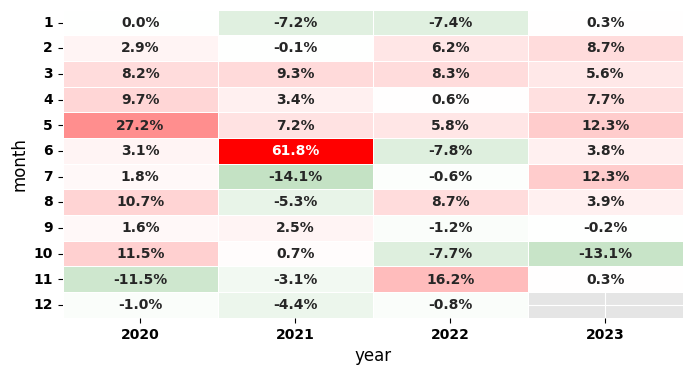

In [269]:
# 績效指標
def perf_cal(df_tr, name_1, name_2):
    status = {}
    status['最大回撤'] = -((df_tr[name_1].cummax() - df_tr[name_1])/df_tr[name_1].cummax()).max()
    status['累積報酬'] = [df_tr[name_1].iloc[-1]]
    status['年化報酬'] = [(df_tr[name_1].iloc[-1] ** (12/len(df_tr))-1)]
    std = df_tr[name_2].std() * np.sqrt(12)
    status['Sharpe Ratio'] = status['年化報酬'] / std
    status = pd.DataFrame(status).transpose()
    status.columns = [name_1]
    return status

# 累積報酬圖
def plot_total_return(df_portfolio_tr,df_benchmark_tr, name):
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(df_portfolio_tr.index, df_portfolio_tr['Portfolio Total Return'], label='Portfolio', linewidth=3)
    ax.plot(df_benchmark_tr.index, df_benchmark_tr['Benchmark Total Return'], label='Benchmark', linewidth=3)
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(1))
    plt.legend(loc='upper left')
    plt.title('Total Return')
    plt.xticks(rotation=20)
    plt.tight_layout()

# 月度勝率圖
def plot_monthly_return(df_portfolio_tr, df_benchmark_tr):
    df_portfolio_tr['year'] = df_portfolio_tr.index.year
    df_portfolio_tr['month'] = df_portfolio_tr.index.month
    df_benchmark_tr['year'] = df_benchmark_tr.index.year
    df_benchmark_tr['month'] = df_benchmark_tr.index.month
    rt_pivot_strategy = df_portfolio_tr.pivot(index='year', columns='month', values='Portfolio Return')
    rt_pivot_benchmark = df_benchmark_tr.pivot(index='year', columns='month', values='Benchmark Return')
    rt_pivot_excess = rt_pivot_strategy - rt_pivot_benchmark

    cmap1= LinearSegmentedColormap.from_list("custom", [(0, "green"), (0.5, "white"), (1, "red")])
    fig, ax = plt.subplots(figsize=(8,4))  
    sns.heatmap(rt_pivot_excess.T,annot=True, xticklabels= True, yticklabels= True, cmap=cmap1, center=0, fmt='.1%', cbar=False, linewidths=0.5)
    plt.yticks(rotation=0)


# 呼叫績效呈現函式
plot_total_return(df_portfolio_tr,df_benchmark_tr, 'Portfolio_1')
plot_monthly_return(df_portfolio_tr, df_benchmark_tr)
portfolio_perf = perf_cal(df_portfolio_tr, 'Portfolio Total Return','Portfolio Return')
benchmark_perf = perf_cal(df_benchmark_tr, 'Benchmark Total Return','Benchmark Return')
summary_perf = pd.concat([portfolio_perf,benchmark_perf],axis=1)
summary_perf

### 課堂實作練習:

  - 將前一節課堂練習中，篩選出的投資組合，計算其累積報酬、績效指標、勝率。